In [ ]:
# Tasks :

# On the Wine Quality dataset, perform the following task.
# 1 Data Loading
# 2 Data Visualization
# 3 Data Preprocessing
# 4 Classification
# Make sure you find the best performing classifier by applying cross validations and
# hyperparameter tuning using GridSearchCV.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [16]:
# Load red wine and white wine datasets
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

# add a 'type' column to distinguis between red and white wines
red_wine['type'] = 'red'
white_wine['type'] = 'white'

#combine
wine_data = pd.concat([red_wine,white_wine],ignore_index=True)



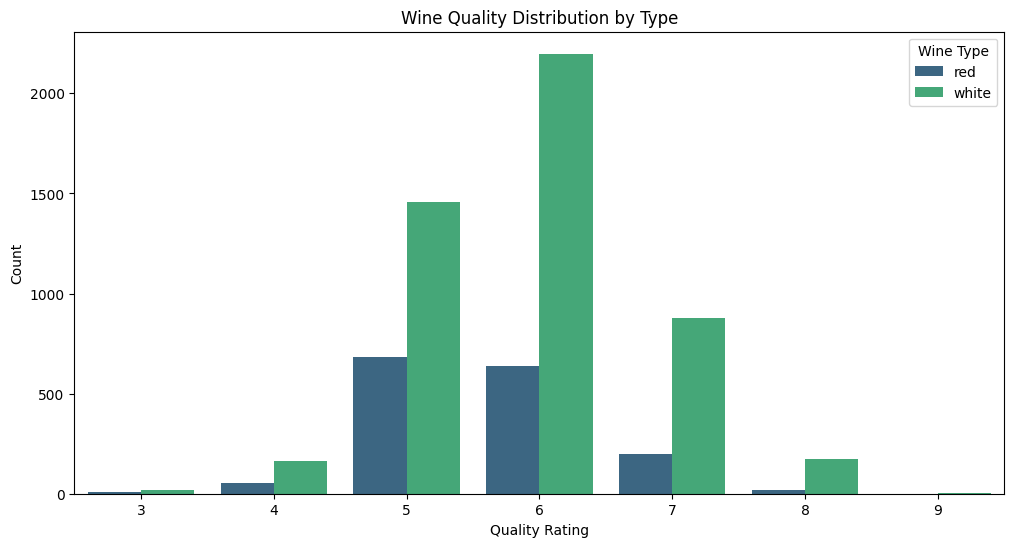

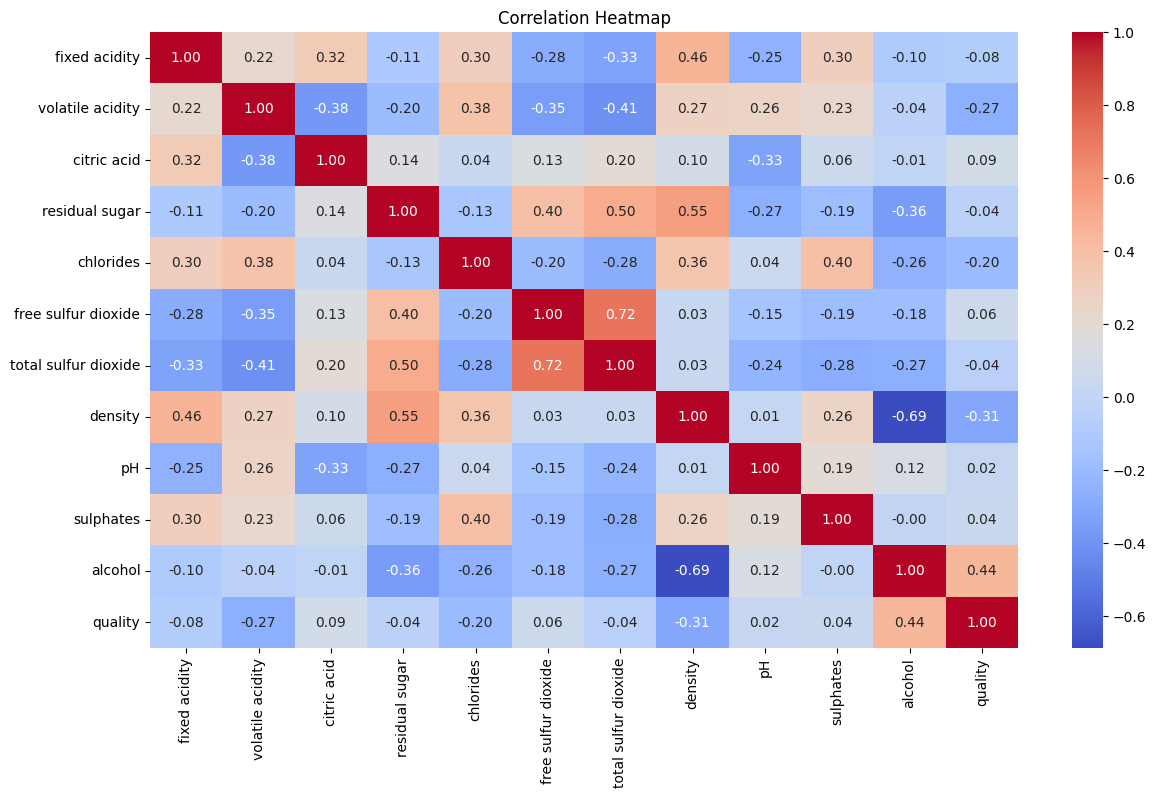

In [17]:
#Data visualization
#Distribution of wine quality ratings

plt.figure(figsize=(12, 6))
sns.countplot(x='quality', hue='type', data=wine_data, palette='viridis')
plt.title('Wine Quality Distribution by Type')
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.legend(title='Wine Type')
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 8))
# Excluding non-numeric columns
corr_matrix = wine_data.drop(columns=['type']).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
#Data preprocessing

# check for missing values
print(wine_data.isnull().sum())

# we proceed with splitting features and target
X = wine_data.drop(columns=['quality', 'type'])
y = wine_data['quality']

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
# Classification with hyperparamerter tuning
# Defining parameter grid for RandonForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\Acer\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [21]:
# Print best parameters and best score
print("Best parameters found is: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters found is:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.67


In [22]:
# Evaluate on test set
y_pred = grid_search.predict(X_test_scaled)
print("\nTest set accuracy is: {:.2f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))


Test set accuracy is: 0.67
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.71      0.12      0.20        43
           5       0.67      0.72      0.69       402
           6       0.65      0.75      0.70       597
           7       0.69      0.55      0.61       215
           8       0.92      0.33      0.49        36
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.52      0.35      0.38      1300
weighted avg       0.67      0.67      0.66      1300



C:\Users\Acer\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
